In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.randn(6,4)

array([[-1.67694721,  1.05208067,  1.79609291, -0.34297715],
       [-1.23891883, -0.57052955,  0.5892619 ,  0.18863589],
       [-0.4604274 ,  0.18761847,  0.7233013 , -0.87145243],
       [ 0.96025054,  0.42331625, -2.52301526,  0.01608702],
       [ 0.75527051, -1.66996062,  0.15581184,  0.2049632 ],
       [ 0.11483468, -0.89467492, -0.48523511, -2.50407699]])

In [23]:
r = pd.Series(np.random.randn(5), ['a','b','c','d','e'])
r

a    0.146414
b    0.039127
c    0.783299
d   -0.855858
e   -1.086689
dtype: float64

In [24]:
r.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [25]:
r[0]

0.14641432188636339

In [27]:
r > 0

a     True
b     True
c     True
d    False
e    False
dtype: bool

In [28]:
r[r>0]

a    0.146414
b    0.039127
c    0.783299
dtype: float64

In [33]:
# Note you pass a list of indexes
r[[-1,0,2]]

e   -1.086689
a    0.146414
c    0.783299
dtype: float64

In [34]:
np.exp(r)

a    1.157676
b    1.039902
c    2.188680
d    0.424918
e    0.337332
dtype: float64

In [35]:
type(np.exp(r))

pandas.core.series.Series

In [36]:
# A Series is like a fixed-size dict in that you can get and set values by index label:
r['b']

0.03912675269100118

In [37]:
r.b

0.03912675269100118

In [39]:
'b' in r

True

In [40]:
r.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [41]:
# Vectorized operations and label alignment with Series
# When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.
r + r

a    0.292829
b    0.078254
c    1.566597
d   -1.711716
e   -2.173378
dtype: float64

In [43]:
r * 4

a    0.585657
b    0.156507
c    3.133195
d   -3.423432
e   -4.346755
dtype: float64

In [45]:
r**2

a    0.021437
b    0.001531
c    0.613557
d    0.732493
e    1.180893
dtype: float64

### A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.
The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

In [49]:
r[1:]

b    0.039127
c    0.783299
d   -0.855858
e   -1.086689
dtype: float64

In [50]:
r[:-1]

a    0.146414
b    0.039127
c    0.783299
d   -0.855858
dtype: float64

In [51]:
r[1:] + r[:-1]

a         NaN
b    0.078254
c    1.566597
d   -1.711716
e         NaN
dtype: float64

You can name a series

In [52]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -1.769128
1   -0.234699
2   -0.001444
3   -2.093658
4   -0.535883
Name: something, dtype: float64

### Series from a Dictionary

In [22]:
pd.Series({'a': 1, 'b': 2, 'c': 3.14})

a    1.00
b    2.00
c    3.14
dtype: float64

# DataFrame
## DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects

https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro

In [54]:
pd.DataFrame(np.random.randn(5,2), ['a','b','c','d','e'], ['col1','col2'])

,col1,col2
a,-0.833271,-1.105004
b,-1.069055,1.347315
c,0.052157,0.756602
d,-2.062789,-0.082383
e,-1.628761,0.669959


In [57]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [59]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [62]:
# The row and column labels can be accessed respectively by accessing the index and columns attributes:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [63]:
df.columns

Index(['one', 'two'], dtype='object')

In [65]:
df.loc['b','two']

2.0

### You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [70]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [71]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [72]:
type(df['one'])

pandas.core.series.Series

In [73]:
df['one']['c']

3.0

In [75]:
df.loc['c','one']

3.0

In [76]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [77]:
df['three'] = df['one'] + df['two']

In [78]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [79]:
df['flag'] = df['one'] > 2

In [80]:
df

,one,two,three,flag
a,1.0,1.0,2.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,6.0,True
d,NaN,4.0,NaN,False


In [83]:
new_df = df.assign(newcol = df['two'] + df['three'])

In [84]:
df

,one,two,three,flag
a,1.0,1.0,2.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,6.0,True
d,NaN,4.0,NaN,False


In [85]:
new_df

,one,two,three,flag,newcol
a,1.0,1.0,2.0,False,3.0
b,2.0,2.0,4.0,False,6.0
c,3.0,3.0,6.0,True,9.0
d,NaN,4.0,NaN,False,NaN


### assign does not modify the dataframe but creates a new one.  You can chain operations too.  If you pass a callable (e.g. lambda), you can refer to the dataframe by the single argument.

In [86]:
df.assign(newcol = df['two'] + df['three']).assign(doublenew = lambda d: d['newcol'] * 2)

,one,two,three,flag,newcol,doublenew
a,1.0,1.0,2.0,False,3.0,6.0
b,2.0,2.0,4.0,False,6.0,12.0
c,3.0,3.0,6.0,True,9.0,18.0
d,NaN,4.0,NaN,False,NaN,NaN


In [90]:
help(pd.DataFrame.assign)

Help on function assign in module pandas.core.frame:

assign(self, **kwargs)
    Assign new columns to a DataFrame, returning a new object
    (a copy) with the new columns added to the original ones.
    Existing columns that are re-assigned will be overwritten.
    
    Parameters
    ----------
    kwargs : keyword, value pairs
        keywords are the column names. If the values are
        callable, they are computed on the DataFrame and
        assigned to the new columns. The callable must not
        change input DataFrame (though pandas doesn't check it).
        If the values are not callable, (e.g. a Series, scalar, or array),
        they are simply assigned.
    
    Returns
    -------
    df : DataFrame
        A new DataFrame with the new columns in addition to
        all the existing columns.
    
    Notes
    -----
    Assigning multiple columns within the same ``assign`` is possible.
    For Python 3.6 and above, later items in '\*\*kwargs' may refer to
    newly c

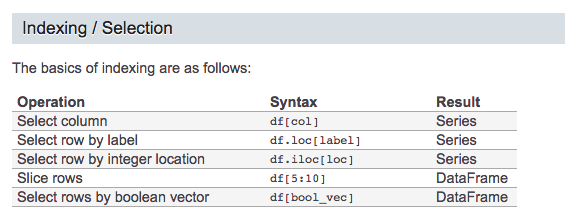

In [91]:
df

,one,two,three,flag
a,1.0,1.0,2.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,6.0,True
d,NaN,4.0,NaN,False


In [93]:
df.loc['b']

one          2
two          2
three        4
flag     False
Name: b, dtype: object

In [94]:
df.loc['a']

one          1
two          1
three        2
flag     False
Name: a, dtype: object

In [95]:
df.loc['a'] + df.loc['b']

one          3
two          3
three        6
flag     False
dtype: object

### Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [96]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df + df2

,A,B,C,D
0,-0.883206,0.468994,0.454072,NaN
1,-1.200047,-2.240392,0.056410,NaN
2,1.583691,-0.407867,-1.071818,NaN
3,2.033017,-0.979687,-0.879928,NaN
4,-1.844052,0.827675,1.505487,NaN
5,-0.899336,1.277919,-1.058340,NaN
6,0.444969,-0.037954,1.258722,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [98]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
print(df)
print(df.iloc[0])
df - df.iloc[0]

          A         B         C         D
0  1.594585 -0.734946 -0.211459  1.955990
1  0.069092 -1.387514  0.791077  0.348473
2 -1.399662 -0.519973  1.498476 -2.097692
3  1.719278 -0.586054 -0.179738 -0.111566
4  0.777287 -1.261986  1.085029  0.332685
5  0.963554 -0.989101 -0.574811 -0.314408
6  1.238280  1.328624 -0.299472 -0.144359
7 -1.017945 -0.158245 -0.270070  1.628091
8  2.118774  1.873673  0.299924 -0.807937
9 -0.546235 -0.725517  1.012687 -1.759136
A    1.594585
B   -0.734946
C   -0.211459
D    1.955990
Name: 0, dtype: float64


,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.525493,-0.652568,1.002536,-1.607517
2,-2.994247,0.214973,1.709935,-4.053682
3,0.124693,0.148892,0.031721,-2.067556
4,-0.817298,-0.527039,1.296487,-1.623305
5,-0.631031,-0.254154,-0.363352,-2.270399
6,-0.356305,2.063570,-0.088013,-2.100349
7,-2.612530,0.576701,-0.058612,-0.327900
8,0.524189,2.608619,0.511383,-2.763927
9,-2.140820,0.009429,1.224146,-3.715126


### To transpose, access the T attribute (also the transpose function), similar to an ndarray:

In [99]:
df

,A,B,C,D
0,1.594585,-0.734946,-0.211459,1.955990
1,0.069092,-1.387514,0.791077,0.348473
2,-1.399662,-0.519973,1.498476,-2.097692
3,1.719278,-0.586054,-0.179738,-0.111566
4,0.777287,-1.261986,1.085029,0.332685
5,0.963554,-0.989101,-0.574811,-0.314408
6,1.238280,1.328624,-0.299472,-0.144359
7,-1.017945,-0.158245,-0.270070,1.628091
8,2.118774,1.873673,0.299924,-0.807937
9,-0.546235,-0.725517,1.012687,-1.759136


In [100]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,1.594585,0.069092,-1.399662,1.719278,0.777287,0.963554,1.238280,-1.017945,2.118774,-0.546235
B,-0.734946,-1.387514,-0.519973,-0.586054,-1.261986,-0.989101,1.328624,-0.158245,1.873673,-0.725517
C,-0.211459,0.791077,1.498476,-0.179738,1.085029,-0.574811,-0.299472,-0.270070,0.299924,1.012687
D,1.955990,0.348473,-2.097692,-0.111566,0.332685,-0.314408,-0.144359,1.628091,-0.807937,-1.759136


In [101]:
df.T[4]

A    0.777287
B   -1.261986
C    1.085029
D    0.332685
Name: 4, dtype: float64

In [102]:
df

,A,B,C,D
0,1.594585,-0.734946,-0.211459,1.955990
1,0.069092,-1.387514,0.791077,0.348473
2,-1.399662,-0.519973,1.498476,-2.097692
3,1.719278,-0.586054,-0.179738,-0.111566
4,0.777287,-1.261986,1.085029,0.332685
5,0.963554,-0.989101,-0.574811,-0.314408
6,1.238280,1.328624,-0.299472,-0.144359
7,-1.017945,-0.158245,-0.270070,1.628091
8,2.118774,1.873673,0.299924,-0.807937
9,-0.546235,-0.725517,1.012687,-1.759136


In [103]:
np.exp(df)

,A,B,C,D
0,4.926284,0.479531,0.809403,7.070917
1,1.071535,0.249695,2.205771,1.416902
2,0.246680,0.594537,4.474863,0.122739
3,5.580500,0.556519,0.835489,0.894433
4,2.175561,0.283091,2.959524,1.394708
5,2.620994,0.371911,0.562811,0.730221
6,3.449674,3.775845,0.741210,0.865577
7,0.361337,0.853641,0.763326,5.094138
8,8.320928,6.512169,1.349756,0.445777
9,0.579126,0.484074,2.752988,0.172194


### dot is the matrix multiplication.  T is the transpose

In [104]:
df.T.dot(df)

,A,B,C,D
A,16.352180,2.690903,-2.413000,3.255961
B,2.690903,11.477410,-2.944706,-1.560755
C,-2.413000,-2.944706,5.734058,-5.139773
D,3.255961,-1.560755,-5.139773,14.988460


In [105]:
df

,A,B,C,D
0,1.594585,-0.734946,-0.211459,1.955990
1,0.069092,-1.387514,0.791077,0.348473
2,-1.399662,-0.519973,1.498476,-2.097692
3,1.719278,-0.586054,-0.179738,-0.111566
4,0.777287,-1.261986,1.085029,0.332685
5,0.963554,-0.989101,-0.574811,-0.314408
6,1.238280,1.328624,-0.299472,-0.144359
7,-1.017945,-0.158245,-0.270070,1.628091
8,2.118774,1.873673,0.299924,-0.807937
9,-0.546235,-0.725517,1.012687,-1.759136


In [106]:
df.dot(df.T)

,0,1,2,3,4,5,6,7,8,9
0,6.953460,1.644251,-6.269658,2.992040,2.588231,1.769973,0.779036,1.734740,0.357778,-3.992796
1,1.644251,2.677206,1.079185,0.750883,2.779000,0.874683,-2.045140,0.502934,-2.497638,1.157027
2,-6.269658,1.079185,8.875165,-2.136979,0.496278,-1.036152,-2.569952,-2.312864,-1.795594,6.349405
3,2.992040,0.750883,-2.136979,3.344130,1.843827,2.374676,1.420234,-1.790488,2.580919,-0.499697
4,2.588231,2.779000,0.496278,1.843827,3.484749,1.268903,-1.087168,-0.342925,-0.661015,1.004567
5,1.769973,0.874683,-1.036152,2.374676,1.268903,2.336017,0.096533,-1.180971,0.269924,0.162267
6,0.779036,-2.045140,-2.569952,1.420234,-1.087168,0.096533,3.409101,-1.624900,5.139855,-1.689656
7,1.734740,0.502934,-2.312864,-1.790488,-0.342925,-1.180971,-1.624900,3.784871,-3.849690,-2.466683
8,0.357778,-2.497638,-1.795594,2.580919,-0.661015,0.269924,5.139855,-3.849690,8.742567,-0.791731
9,-3.992796,1.157027,6.349405,-0.499697,1.004567,0.162267,-1.689656,-2.466683,-0.791731,4.944842


### On a series object, dot does the dot product

In [109]:
s = pd.Series(np.random.randn(3), ['a','b','c'])
s

a    0.347547
b    0.178730
c    0.816665
dtype: float64

In [110]:
s.dot(s)

0.819675668777953

In [116]:
s = pd.Series(np.arange(1,4))
s

0    1
1    2
2    3
dtype: int64

In [117]:
s.dot(s)

14